# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Data Exploration

In [2]:
# Loading the dataset
df = pd.read_csv('Salary_Dataset_with_Extra_Features.csv')

In [3]:
df.shape

(22770, 8)

In [4]:
df.head(3)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
df['Salary'].describe()

count    2.277000e+04
mean     6.953872e+05
std      8.843990e+05
min      2.112000e+03
25%      3.000000e+05
50%      5.000000e+05
75%      9.000000e+05
max      9.000000e+07
Name: Salary, dtype: float64

In [7]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


## Data cleaning
After reviewing the dataset, the only issue was the NaN value somewhere for the company name, so I will clean it up.
As for data types, all of them are valid so there is no need to do anything else.

In [8]:
# Removing the NaN value since there is one missing company name
df = df.dropna()
# Checking if everything is okay
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22769 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22769 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22769 non-null  object 
 3   Salary             22769 non-null  int64  
 4   Salaries Reported  22769 non-null  int64  
 5   Location           22769 non-null  object 
 6   Employment Status  22769 non-null  object 
 7   Job Roles          22769 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


# Exploratory Data Analysis (EDA)

In this section, I will explore the dataset to identify trends, distributions, and possible relationships between variables such as Salary, Job Title, Location, and Company Rating.


### What is the distribution for salaries in the whole dataset?
I will plot a histogram to see how are salaries distributed on the whole data set.

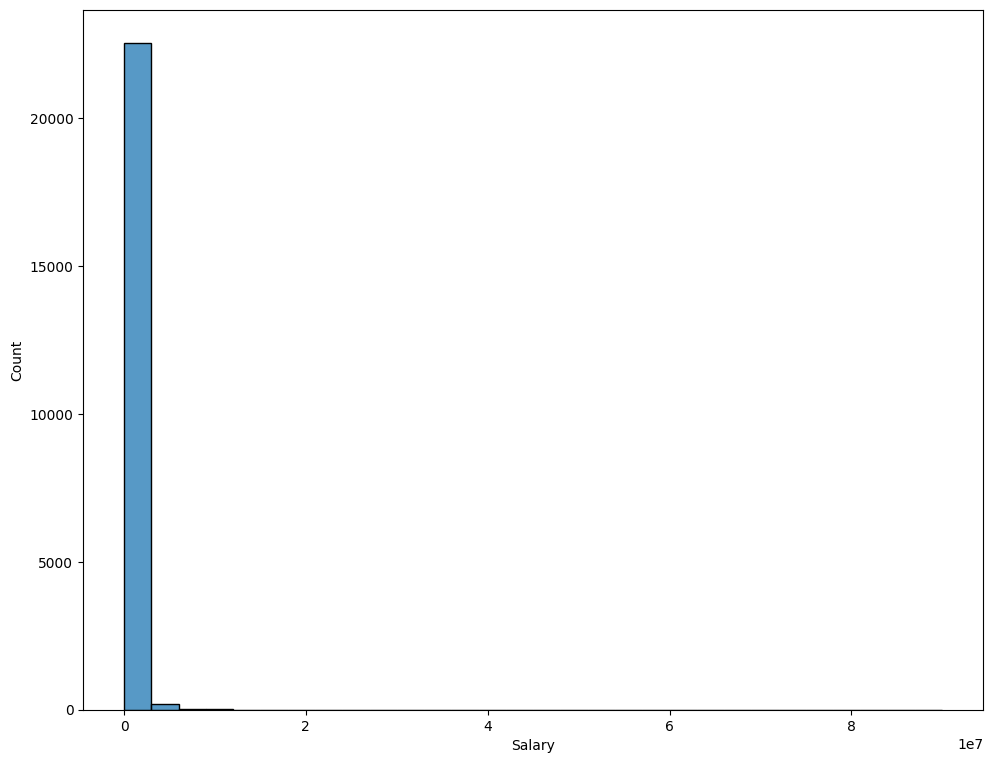

In [9]:
fig = plt.figure(figsize = (9,7))
ax1 = fig.add_axes([0,0,1,1])
sns.histplot(data = df, x = 'Salary', bins = 30)
plt.show()

### As we can see most of the values of salary fall into the first bin. So I will set a limit for the salary values and check the plot again. Also from this point on, I will continue working with the filtered dataset (where salaries are below $695,000), as the original dataset includes extreme outliers that significantly distort the visualizations and make the analysis less interpretable.


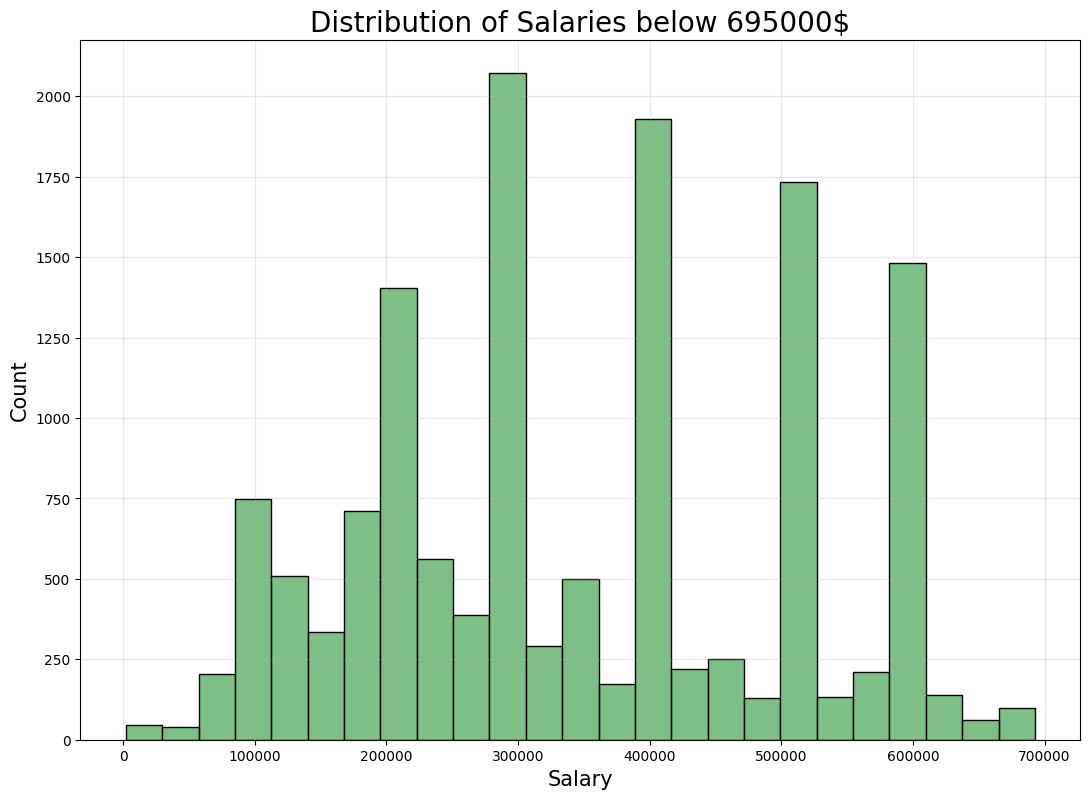

In [10]:
filtered_df = df[df['Salary']<695000] # I decided to chose mean value to filter the data set, since 50% of salaries are below 500 000 and the mean 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Distribution of Salaries below 695000$', fontsize = 20)
ax1.set_xlabel('Salary', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
plt.grid(alpha = 0.3)

sns.histplot(data = filtered_df, x = 'Salary', bins = 25, color = '#52AA5E')
plt.show()

So as it is seen on the plot, the top 4 salary categories are approximately from 280 000 to 300 000, 390 000 and 400 000, 500 000 and 525 000, 580 000 and 610 000 respectively. This may imply that companies tend to offer salaries in these ranges however to confirm this trend further analysis is required.

### Next I would like to compare the salaries between full time, intern and conractor employees, to see the difference in their salaries.
I will be using violin plot to visually compare them.
Also there is 4th category for Trainees however the amount of entries is only 30 so it is irrelevant to include them. Contractors also have only 400 entries however in my opinion this is good enough range for this dataset.

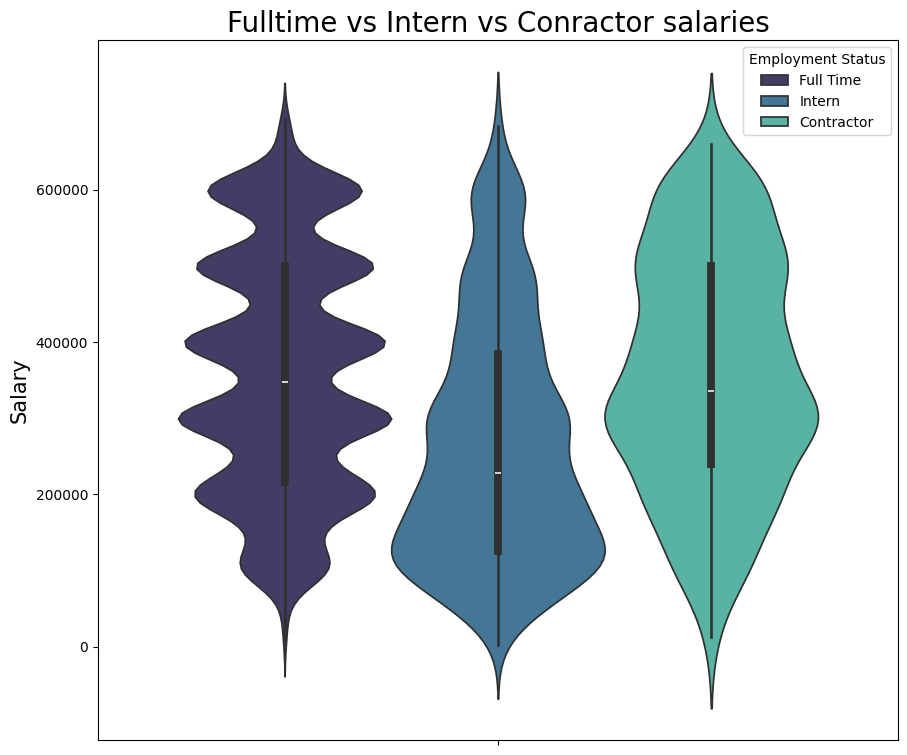

In [11]:
filtered_df = filtered_df[filtered_df['Employment Status'] != 'Trainee'] # Filtering the trainees out


fig = plt.figure(figsize = (8,7))

ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Fulltime vs Intern vs Conractor salaries', fontsize = 20)
ax1.set_ylabel('Salary', fontsize = 15)


sns.violinplot(data = filtered_df, y = 'Salary', hue = 'Employment Status', palette = 'mako')
plt.show()

#### So as we can see from this plot the results are pretty predictable - the Interns earn the least on average and most of entries are below 200 000. The Contractors and Full Time employees mean is almost identical, however they are more evenly distributed along the whole axis starting from 200 000 salary, while Full Time employees have gaps between ranges. In the next step, I will compare the mean salaries across these three categories to confirm the differences quantitatively.

In [12]:
round(filtered_df.groupby('Employment Status')['Salary'].mean(), 0) 

Employment Status
Contractor    356930.0
Full Time     359170.0
Intern        266845.0
Name: Salary, dtype: float64

The values above confirm my previous assumptions, on average full time employee earns 2000 USD more than a contractor a year which is a very little difference so we can ignore it and conclude that average full time employee earns roughly the same amount as a contractor. Speaking of Interns, their mean is almost 100 000 USD less then the 2 other employment types so as excpected interns earn much less than normal employees. 

### What are the most popular positions and how does the salary differ for each of them?
In this section, I will identify the top 10 most common job positions and provide insights into how salaries vary across them.

In [13]:
# Counting and showing the top 10 positions in the dataset
top10pos = pd.DataFrame(filtered_df['Job Title'].value_counts().head(10))
top10pos.reset_index(inplace = True)
top10pos

,Job Title,count
0,Android Developer,1585
1,Software Development Engineer,1259
2,Test Engineer,1019
3,Front End Developer,978
4,Software Development Engineer (SDE),768
5,Web Developer,714
6,Software Development Engineer - Intern,665
7,Python Developer,395
8,Software Development Engineer In Test (SDET),394
9,Backend Developer,342


The series above shows the top 10 job positions and how often they appear in the dataset. As we can see, the most common role is Android Developer with nearly 1600 entries, which is about 400 more than the second most common role. Next, I will plot some graphs to visualize this distribution more clearly.

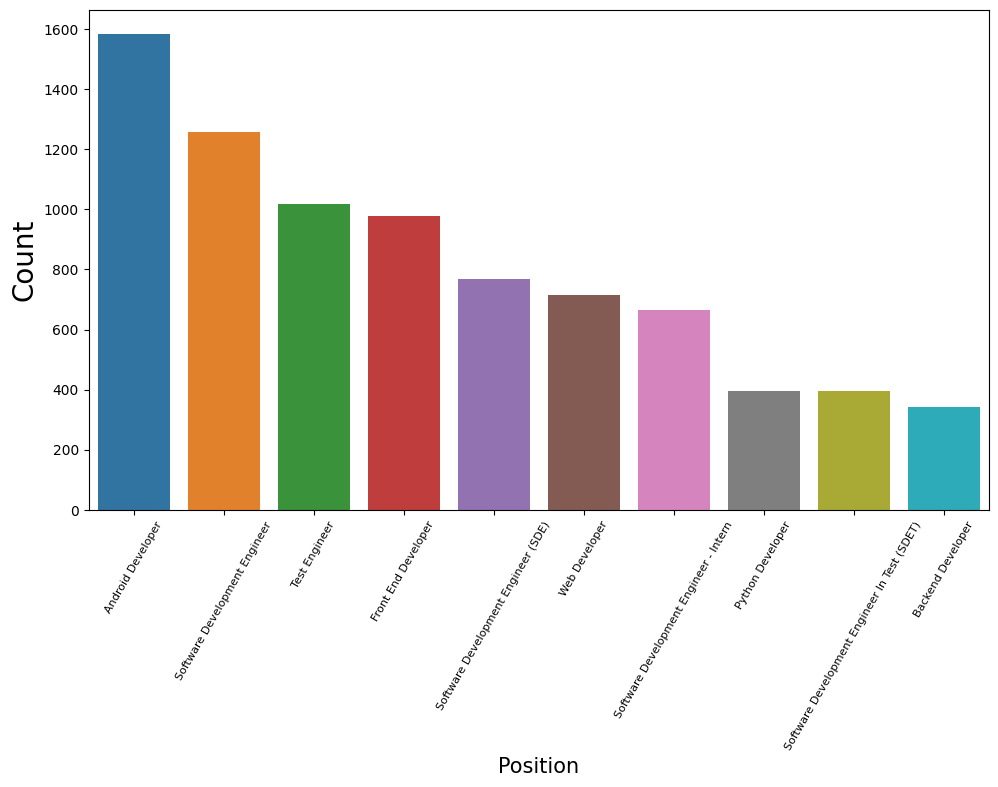

In [14]:
# Plotting the Bar Chart
fig = plt.figure(figsize = (9,5))

ax1 = fig.add_axes([0,0,1,1])
ax1.set_ylabel('Count', fontsize = 20)
ax1.set_xlabel('Position', fontsize = 15)
plt.xticks(rotation = 60, fontsize = 8)


sns.barplot(data = top10pos, x = 'Job Title', y = 'count', hue = 'Job Title')
plt.show()

### Now lets compare the average salary across these positions

In [22]:
top_positions = top10pos['Job Title'].tolist()

top_jobs_df = filtered_df[filtered_df['Job Title'].isin(top_positions)]

avg_salary = round(top_jobs_df.groupby(by = 'Job Title')['Salary'].mean(), 0)

avg_salary

Job Title
Android Developer                               340814.0
Backend Developer                               360300.0
Front End Developer                             354390.0
Python Developer                                354482.0
Software Development Engineer                   378086.0
Software Development Engineer (SDE)             385305.0
Software Development Engineer - Intern          308781.0
Software Development Engineer In Test (SDET)    381898.0
Test Engineer                                   346807.0
Web Developer                                   315220.0
Name: Salary, dtype: float64

### Does the amount of positions correlate to the average salary?

In [26]:
# Creating a new DataFrame to make a regplot
top_10pos_salary = top10pos.copy()
top_10pos_salary['avg_salary'] = top_10pos_salary['Job Title'].map(avg_salary)
top_10pos_salary 

,Job Title,count,avg_salary
0,Android Developer,1585,340814.0
1,Software Development Engineer,1259,378086.0
2,Test Engineer,1019,346807.0
3,Front End Developer,978,354390.0
4,Software Development Engineer (SDE),768,385305.0
5,Web Developer,714,315220.0
6,Software Development Engineer - Intern,665,308781.0
7,Python Developer,395,354482.0
8,Software Development Engineer In Test (SDET),394,381898.0
9,Backend Developer,342,360300.0


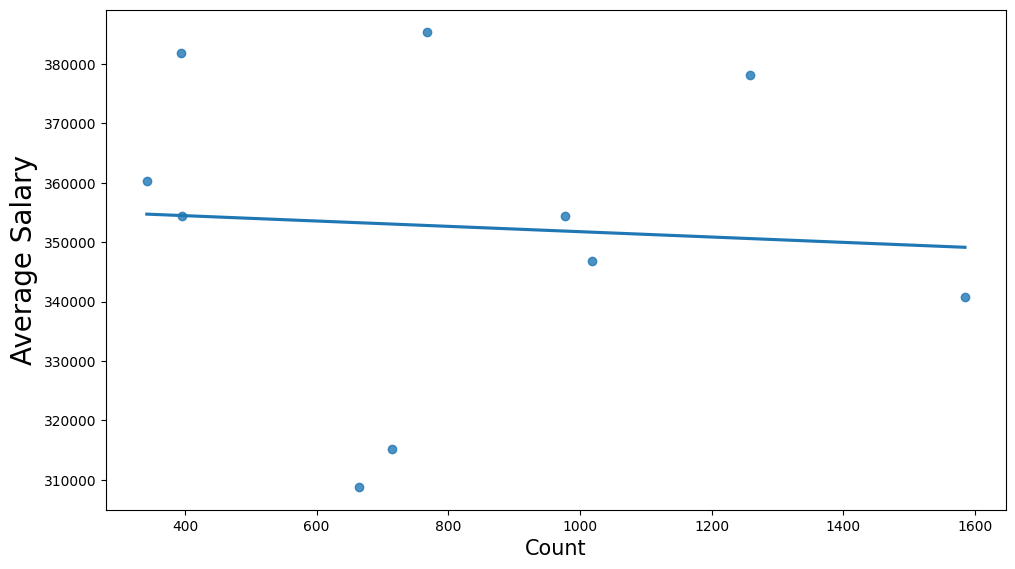

In [34]:
fig = plt.figure(figsize = (9,5))

ax1 = fig.add_axes([0,0,1,1])


sns.regplot(data = top_10pos_salary, x = 'count', y = 'avg_salary', ci = None, ax = ax1)
ax1.set_ylabel('Average Salary', fontsize = 20)
ax1.set_xlabel('Count', fontsize = 15)
plt.show()

As we can see from the graph, the correlation between the number of job entries and the average salary is very weak. While there appears to be a slight trend suggesting that less common positions might offer slightly higher salaries, the relationship is not strong enough to draw any definitive conclusions. Overall, the popularity of a position does not seem to significantly impact its average salary.